Introduction

The Census Income dataset that we are analysing is the dataset in which we need to find out the Income which has two possible values >50K and <50K on the basis of 14 features of dataset

Dataset

The dataset used in this project is "census_income.csv which contain 32560 instances and 15 features.

In [185]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Uploading data

In [186]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [187]:
df.keys

<bound method NDFrame.keys of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   Wh

In [188]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

The dataset has 15 coumumn Age,Work Class,Final wheight,Education,Education_num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country and Income

In [189]:
df.shape

(32560, 15)

The data set has 32560, Rows and 15 columns

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Type data is mix of Integers,object data

In [191]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null value in given dataset

In [192]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [193]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is big difference in mean and 50% in few columns and minimum and maximum value. So the data set is skewed and there are number of outliers in given dataset.

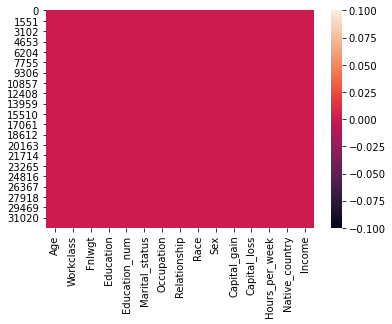

In [194]:
sns.heatmap(df.isnull())

Visualization of categorical dataset

In [195]:
categorical_columns=['Workclass','Marital_status','Occupation','Education','Relationship','Race','Sex','Native_country','Income']
print(categorical_columns)
numerical_columns=['Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
print(numerical_columns)

['Workclass', 'Marital_status', 'Occupation', 'Education', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


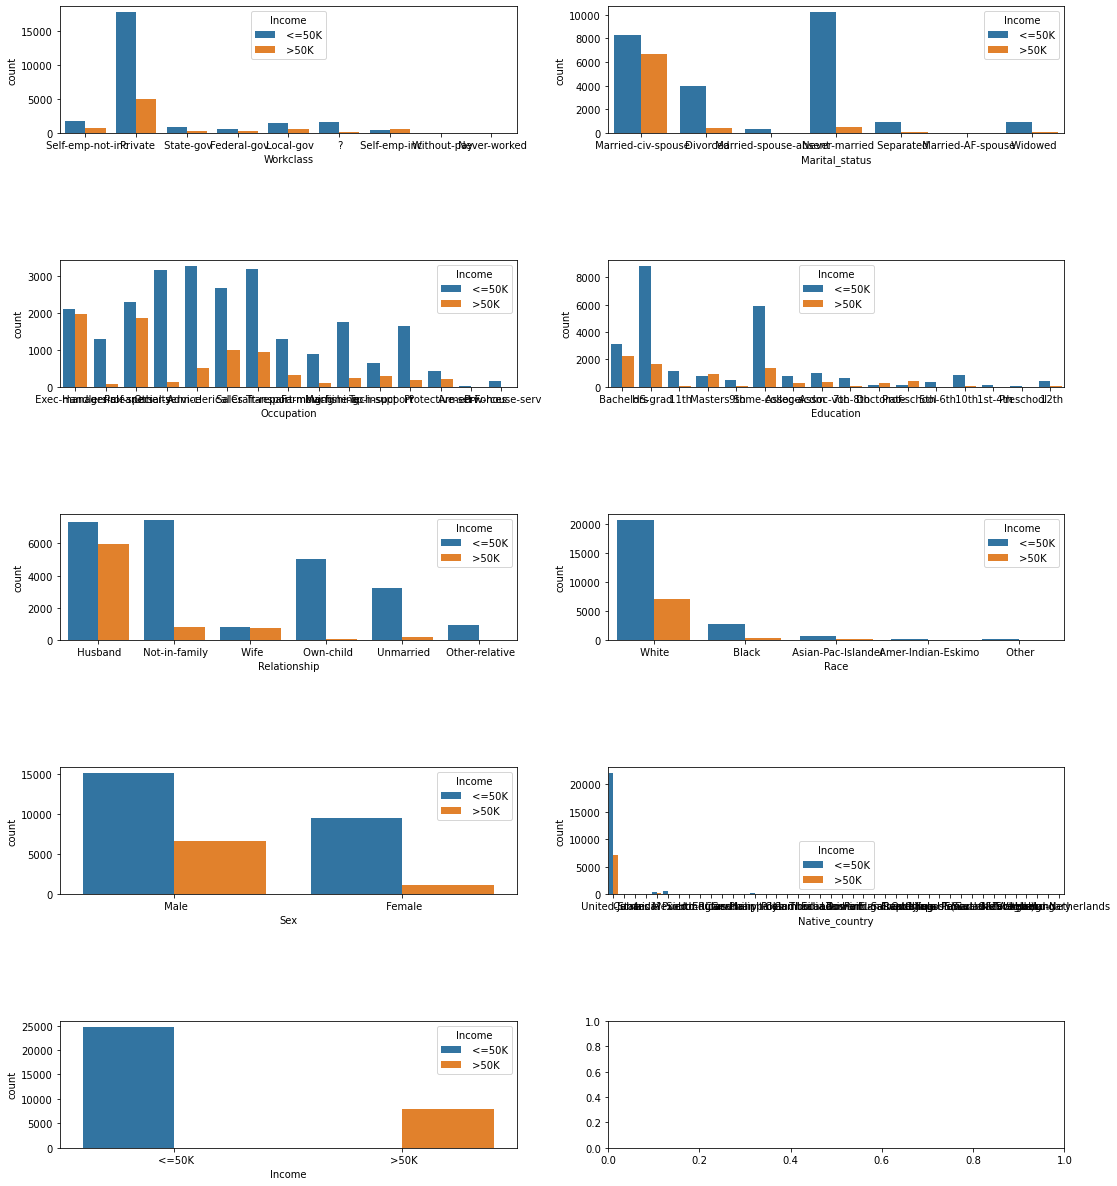

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(5,2,figsize=(18,21))
for idx,cat_col in enumerate(categorical_columns):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Income',ax=axes[row,col])
plt.subplots_adjust(hspace=1)   

The above graphs shows that the person who are in private job got higher income than other work class.
Married people salary is greater than 50K than other marittal status.
The person who are holding managerial and  adminstrative executive and professional specility are getting the salary greater than 50k
Graduate people are getting higher salary than other.
In relation column Husbands are getting greater than 50K income.
White people are getting greater than 50k income compare to other race.
Male are getting higher salary than female.
United state people are getting greater than 50k Income compare to other native states.



Visualzation of numeric dataset

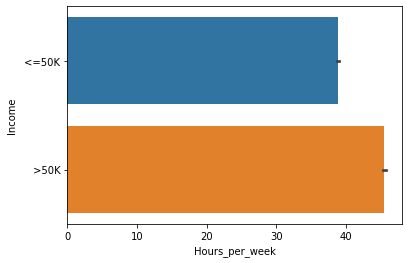

In [197]:
sns.barplot(x="Hours_per_week",y="Income",data=df)

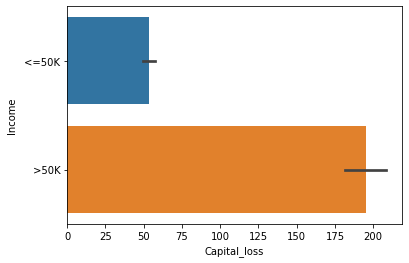

In [198]:
sns.barplot(x="Capital_loss",y="Income",data=df)

The people who have greater than 50k income have more exposure of capital loss

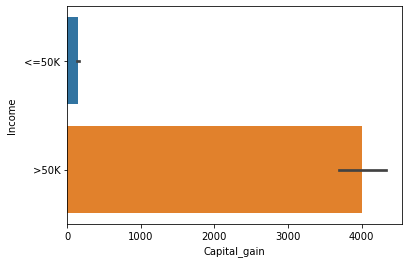

In [199]:
sns.barplot(x="Capital_gain",y="Income",data=df)

People who have greater income have higher capital gain.

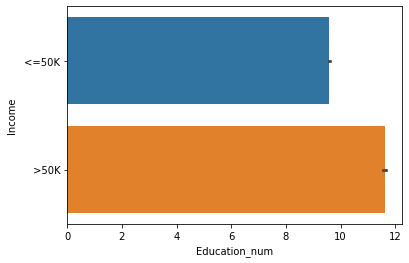

In [200]:
sns.barplot(x="Education_num",y="Income",data=df)

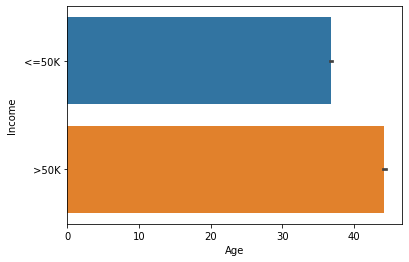

In [201]:
sns.barplot(x="Age",y="Income",data=df)

Checking Object data type columns

In [202]:
for col in df.select_dtypes(['object']).columns: 
    print(col, ':', sorted(df[col].unique()))

Workclass : [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
Education : [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
Marital_status : [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
Occupation : [' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']
Relationship : [' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife']
Race : [' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']
Sex : [' Female', ' Male']
Nat

In [203]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


converting object data type into numerical

In [204]:
var_cat = var_cat.columns.tolist()
var_cat = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']

var_cat
['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

We are dropping Education column as it is a sting column and we have already Education_num column for numerical data

In [205]:
df.drop(['Education'], axis='columns', inplace=True) 

In [206]:
df['Income'].replace({'<=50K':0,'>50K':1},inplace=True)

In [207]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()
df["Workclass"]=LE.fit_transform(df["Workclass"])
df["Marital_status"]=LE.fit_transform(df["Marital_status"])
df["Occupation"]=LE.fit_transform(df["Occupation"])
df["Relationship"]=LE.fit_transform(df["Relationship"])
df["Race"]=LE.fit_transform(df["Race"])
df["Sex"]=LE.fit_transform(df["Sex"])
df["Income"]=LE.fit_transform(df["Income"])
df["Native_country"]=LE.fit_transform(df["Native_country"])

Checking correlation

In [208]:
dfcor=df.corr() 
dfcor

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


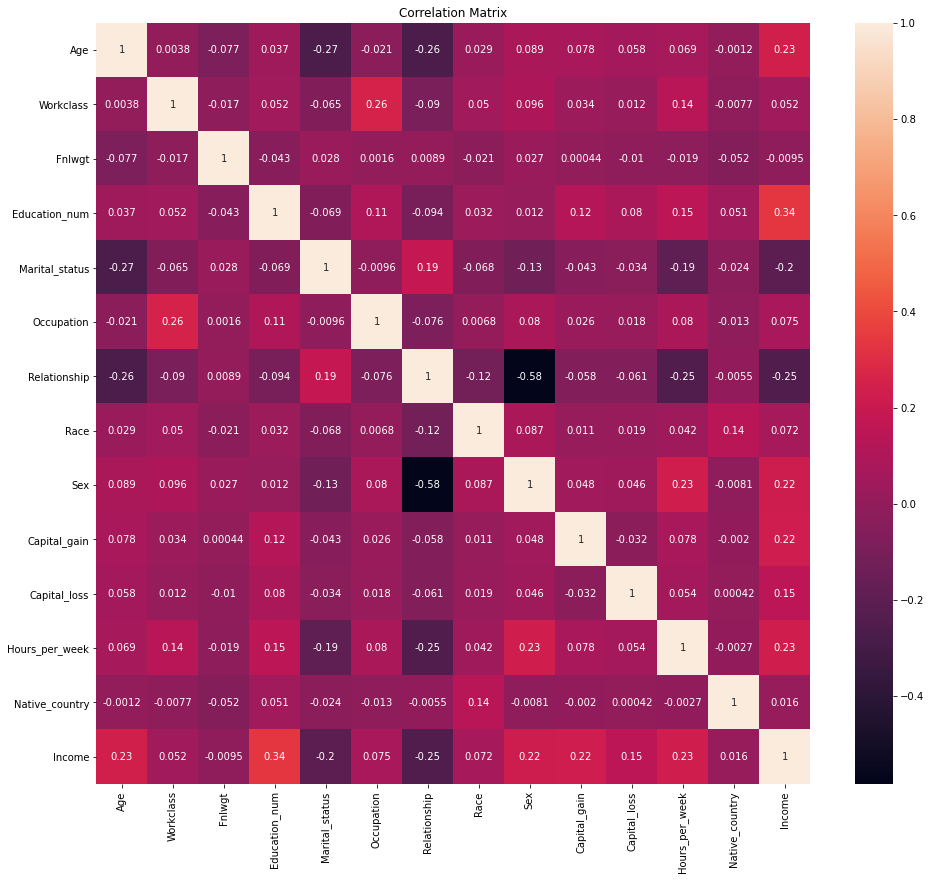

In [209]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

With the help of above graph we analyze that most of the independent variable have moderate correlationship with target variable

In [210]:
corr_matrix=df.corr()

In [211]:
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Age                  AxesSubplot(0.125,0.772143;0.168478x0.107857)
Workclass         AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Fnlwgt            AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Education_num     AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Marital_status       AxesSubplot(0.125,0.642714;0.168478x0.107857)
Occupation        AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Relationship      AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Race              AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Sex                  AxesSubplot(0.125,0.513286;0.168478x0.107857)
Capital_gain      AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Capital_loss      AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Hours_per_week    AxesSubplot(0.731522,0.513286;0.168478x0.107857)
Native_country       AxesSubplot(0.125,0.383857;0.168478x0.107857)
Income            AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

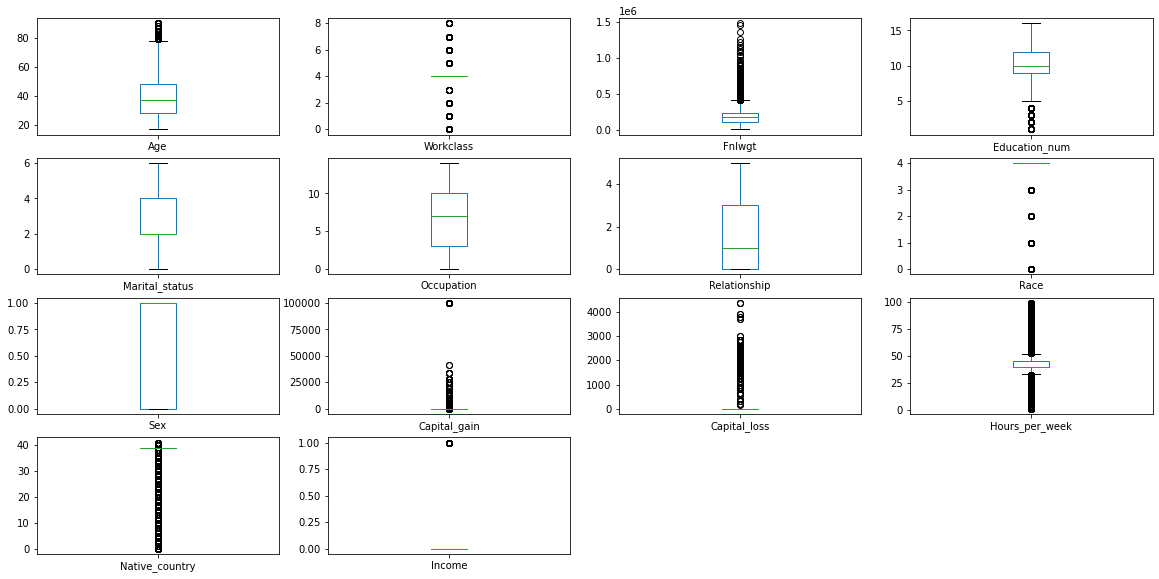

In [212]:
df.plot(kind='box',subplots=True, layout=(6,4), figsize= (20,15))

Native country,hours per week, capital loss, capital gain,race,education num,Fnlwgt,work class and age columns have outliers.
We will not remove the outlierls as the data loss is on very higher side with any of the outliers removal methods

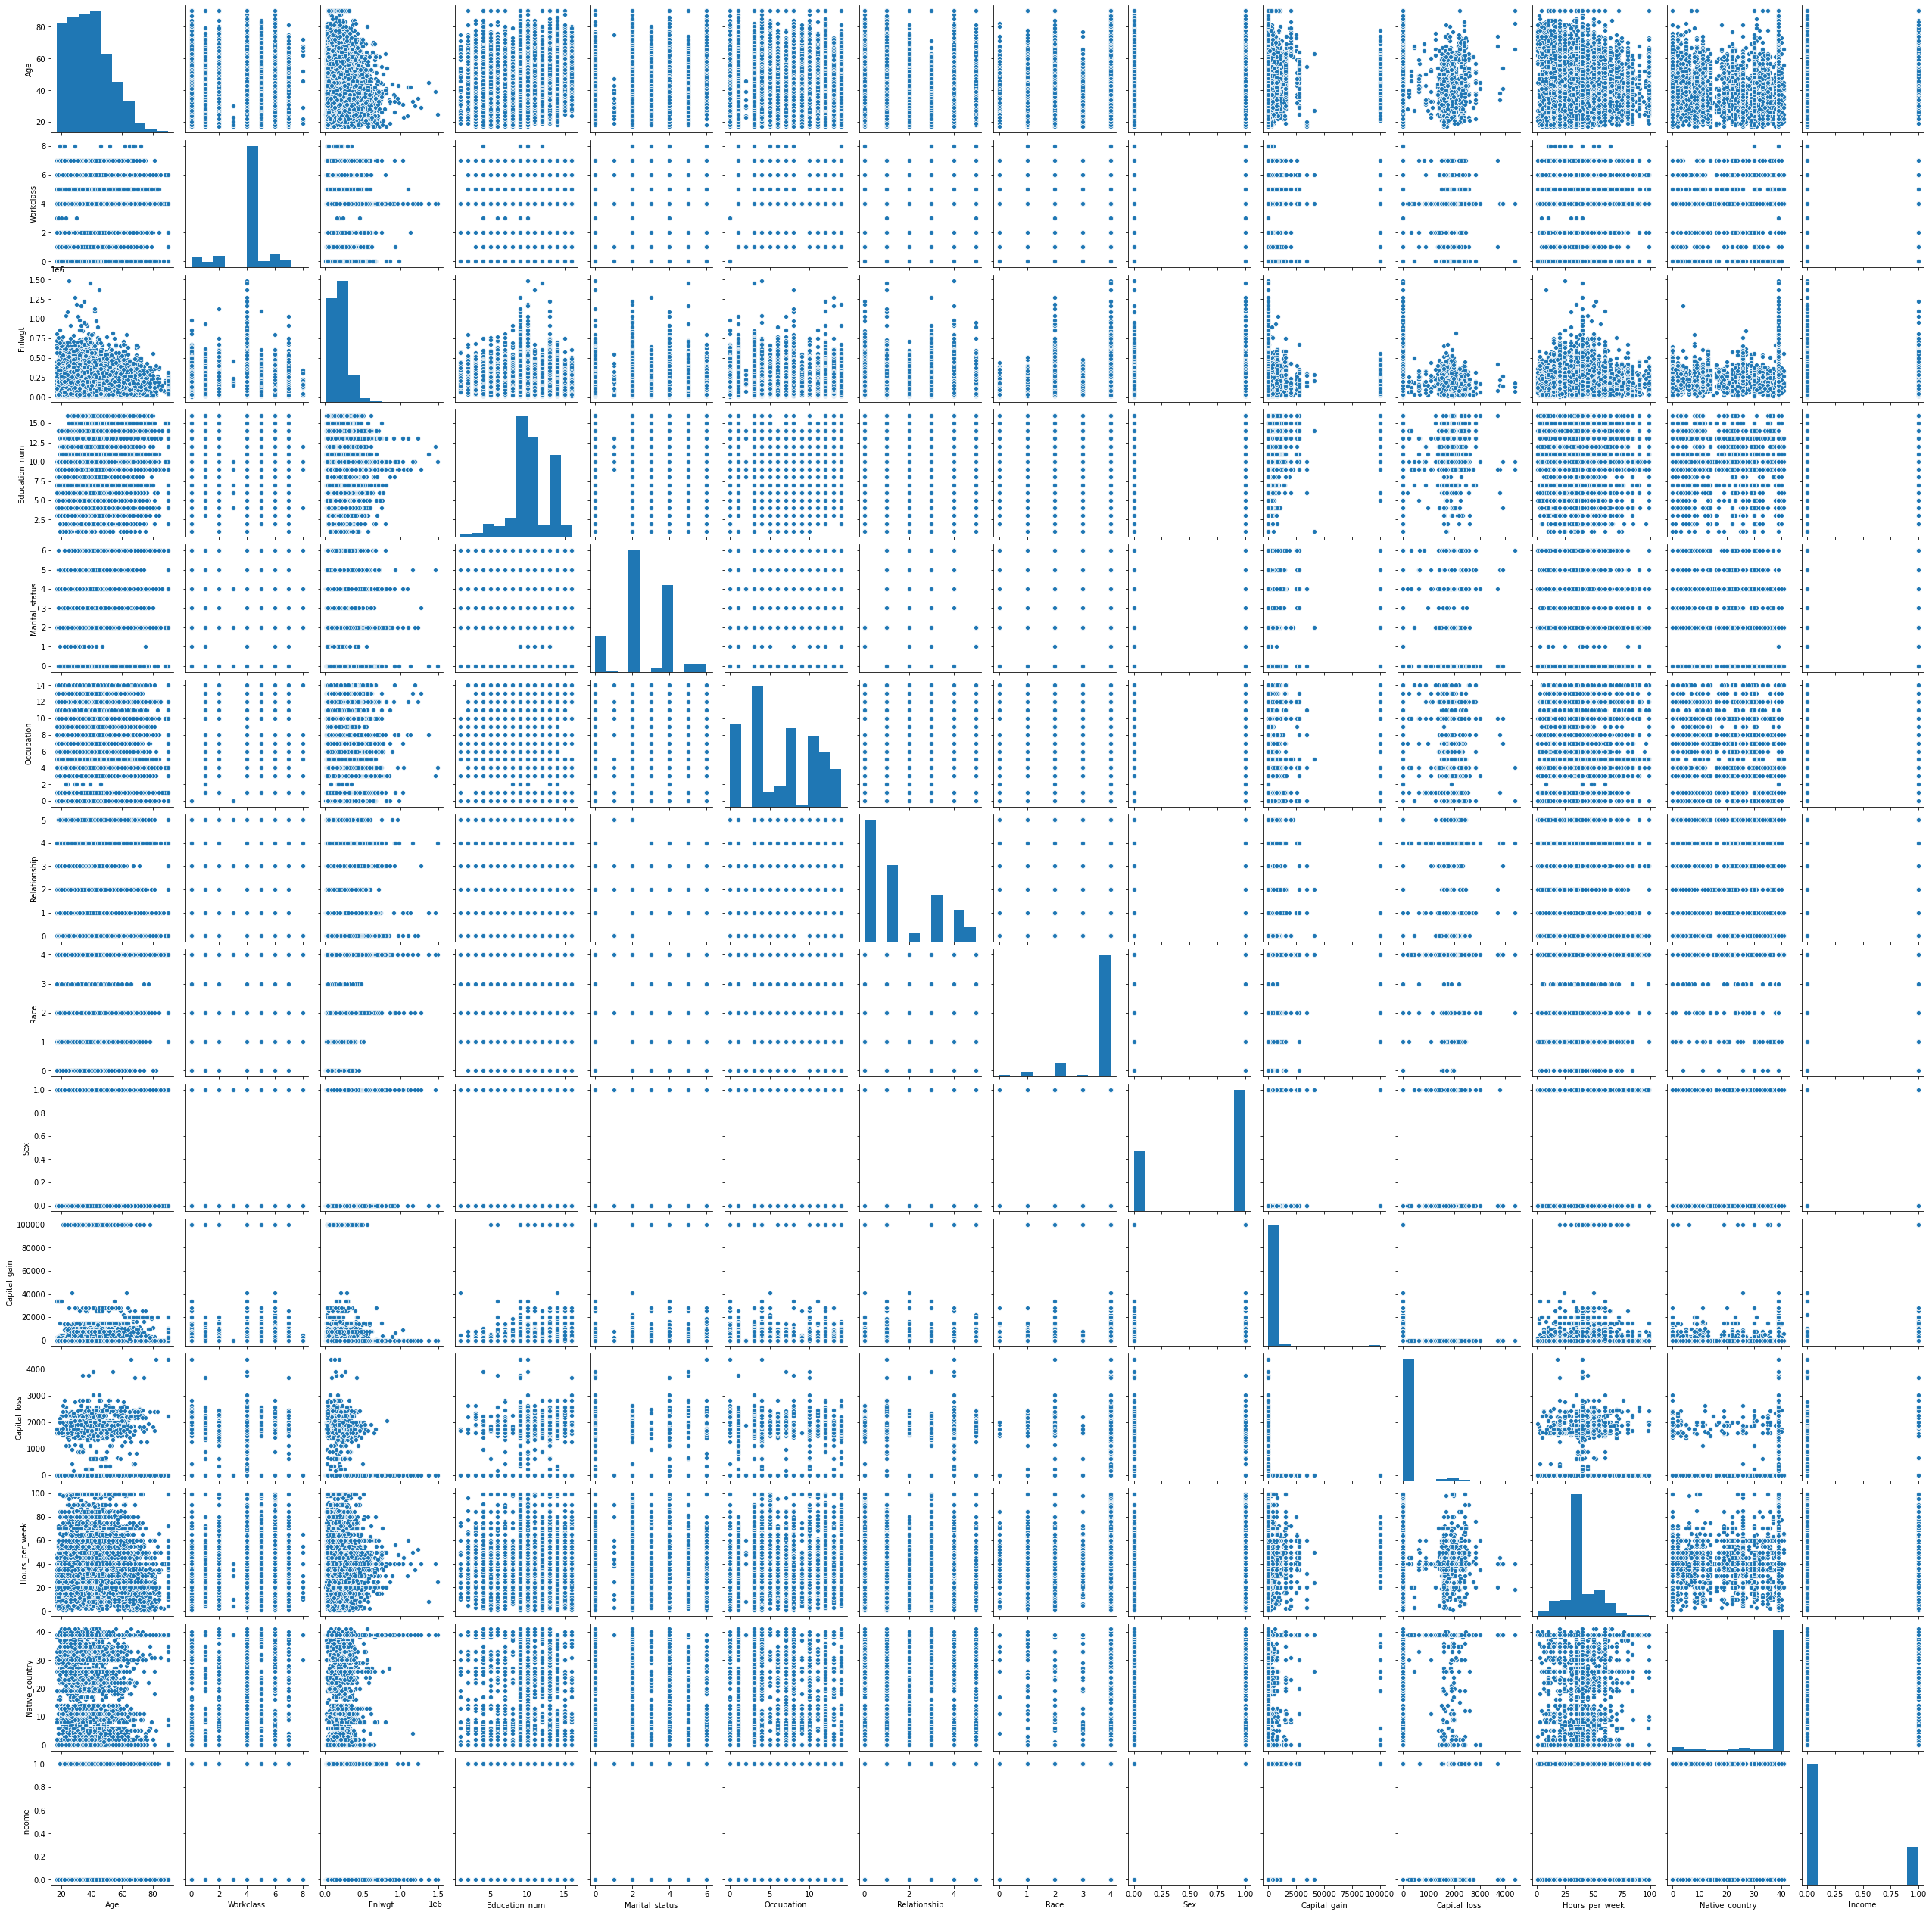

In [213]:
sns.pairplot(df)
plt.show()

Age,Fnlwgt,Relationship,capital gain,capital loss and Income have positively skewed and workclass,race,sex, and native country have positvely skewed.

In [214]:
df.skew() # Checking Skewness

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Removing Skewness: we will remove the skewness for numerical columns only

In [215]:
skew=("Capital_gain","Capital_loss","Fnlwgt")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [216]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt           -0.842559
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

Splitting target variable from independent variables

In [217]:
x=df.drop("Income",axis=1)
y=df["Income"]

Scalling data with the help of standardScaler

In [218]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.83709708,  1.46388339, -1.03603342, ..., -0.22107807,
        -2.22212013,  0.29157343],
       [-0.04264043,  0.09012148,  0.47183429, ..., -0.22107807,
        -0.03542999,  0.29157343],
       [ 1.05703146,  0.09012148,  0.60621773, ..., -0.22107807,
        -0.03542999,  0.29157343],
       ...,
       [ 1.42358875,  0.09012148, -0.08363419, ..., -0.22107807,
        -0.03542999,  0.29157343],
       [-1.21562378,  0.09012148,  0.36418346, ..., -0.22107807,
        -1.65520046,  0.29157343],
       [ 0.98372   ,  0.77700244,  0.93014422, ..., -0.22107807,
        -0.03542999,  0.29157343]])

Training,testing,validating and hyper tunning the data

In [219]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.9666666666666667 on Random_state 64


In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=81)

In [221]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    

0.9666666666666667
[[25  1]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.80      1.00      0.89         4

    accuracy                           0.97        30
   macro avg       0.90      0.98      0.93        30
weighted avg       0.97      0.97      0.97        30



In [222]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8666666666666667
[[24  2]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



In [223]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9666666666666667
[[26  0]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.75      0.86         4

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30



In [224]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9666666666666667
[[26  0]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.75      0.86         4

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30



Cross checking test data with Cross val score

In [225]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.8177518427518427


In [226]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 0.8064496314496313


In [227]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.8465909090909092


In [228]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.8583845208845208


In [229]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [230]:
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [231]:
y_pred_prob

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

In [232]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [233]:
fpr

array([0.        , 0.07692308, 1.        ])

In [234]:
tpr

array([0. , 0.5, 1. ])

In [235]:
thresholds

array([2., 1., 0.])

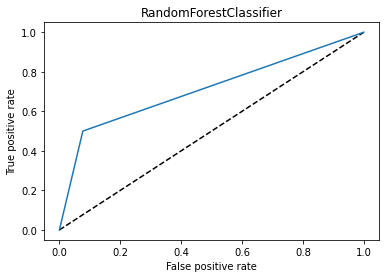

In [236]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [237]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [238]:
print(auc_score)

0.7115384615384616


Hyper tunning the dataset with the help of GridSearchCV

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [248]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [249]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [250]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'gini', 'max_depth': 14}

In [251]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [252]:
accuracy_score(y_test,GCV_pred)

0.9666666666666667

In [255]:
import joblib
joblib.dump(rf,"census_income.csv.obj")


['census_income.csv.obj']

In [256]:
p=joblib.load("census_income.csv.obj")

In [257]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [258]:
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
